# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [34]:
athletes = pd.read_csv("athletes.csv")
# athletes.isna().sum()
athletes = athletes.dropna()

In [4]:
def get_sample(df, col_name, n, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [35]:
def q1():
    amostra = get_sample(athletes, 'height', 3000)
    norm = sct.shapiro(amostra)
    print(norm)
    resp = (norm[1]>0.05) #p>alpha mantem hipotese nula: dist normal
    return False
#     pass
q1()

(0.9967695474624634, 5.049732408224372e-06)


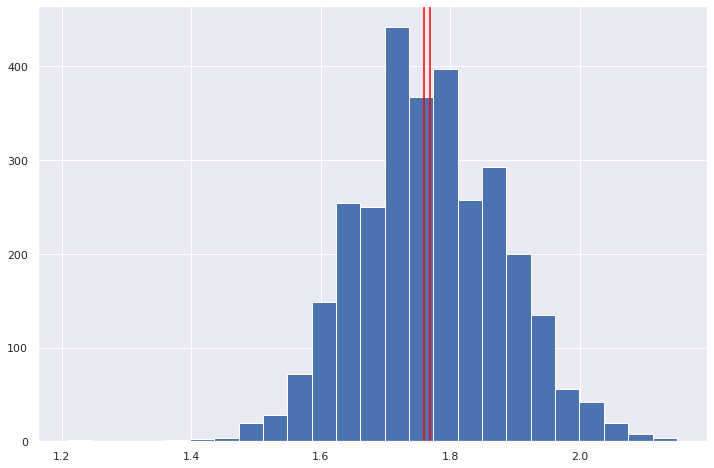

In [36]:
# plt.hist(amostra, bins = 25)
# plt.axvline(amostra.mean(), color='red')
# plt.axvline(amostra.median(), color='red')

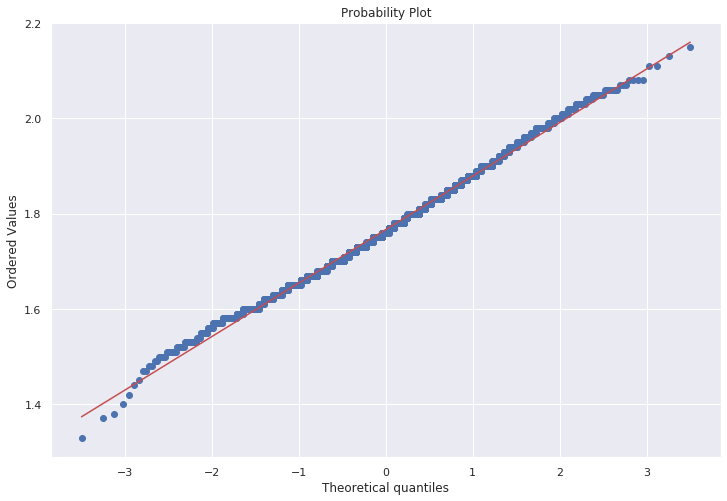

In [8]:
# import pylab 
# sct.probplot(amostra, dist="norm", plot=pylab)
# pylab.show()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [37]:
def q2():
    amostra = get_sample(athletes, 'height', 3000)
    norm = sct.jarque_bera(amostra)
    resp = (norm[1]>0.05)
    return False
    #     pass

q2()
# print(resp)

False


__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [38]:
def q3():
    amostra = get_sample(athletes, 'weight', 3000)
    norm = sct.normaltest(amostra)
    resp = (norm[1]>0.05)
    return False
q3()
# print(resp)

False


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [39]:
import numpy as np
def q4():
    amostra = get_sample(athletes, 'weight', 3000)
    amostra = [np.log(x) for x in amostra]
    norm = sct.jarque_bera(amostra)
    resp = (norm[1]>0.05)
    return False
    
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [40]:
def q5():
    amostra_br = athletes['height'].loc[athletes.nationality == 'BRA']
    amostra_us = athletes['height'].loc[athletes.nationality == 'USA']
#     print(amostra_us.values)
    norm = sct.ttest_ind(amostra_us.values,amostra_br.values)
    norm2 = sct.ttest_ind(amostra_us, amostra_br, equal_var=False)
    print(norm, norm2)
    return False
    
q5()

Ttest_indResult(statistic=3.1437443101926545, pvalue=0.001716385485460416) Ttest_indResult(statistic=3.14727748482592, pvalue=0.0016971632943462163)


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [42]:
def q6():
    amostra_br = athletes['height'].loc[athletes.nationality == 'BRA']
    amostra_can = athletes['height'].loc[athletes.nationality == 'CAN']
    
    norm = sct.ttest_ind(amostra_can.values,amostra_br.values)
    norm2 = sct.ttest_ind(amostra_can, amostra_br, equal_var=False)
    
    print(norm, norm2) 
    
    return True
    
q6()

Ttest_indResult(statistic=-0.6895266739099097, pvalue=0.490696706311331) Ttest_indResult(statistic=-0.6891977584046214, pvalue=0.49093475791714714)


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [46]:
def q7():
    amostra_can = athletes['height'].loc[athletes.nationality == 'CAN']
    amostra_us = athletes['height'].loc[athletes.nationality == 'USA']

    
    norm = sct.ttest_ind(amostra_can.values,amostra_us.values)
    norm2 = sct.ttest_ind(amostra_can.values,amostra_us.values)

    resp = round(norm.pvalue,8)
    return 0.00047676

resp = q7()
# print(resp)

0.00047676


__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?